In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
from textblob import TextBlob
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from better_profanity import profanity
import time

In [68]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

In [3]:
def getClient():
    client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAFHNawEAAAAAEBR%2BdRWNW3GnCkwPl2NGjMFGn50%3DpgDVvbb0wGr4cqYqDdQPIGmmSkW2aOmGsebHk8jTMOACjpo5wc',
                       consumer_key='IGuebB1LTAeoUvnuiLgQOevXn',
                       consumer_secret='HGNIGvA5ZMS2IYPSEtzK9d7LdDOYXqjxrSohTb1SsmGancor9U',
                       access_token='1354231822083911680-bsLj3s1HcCIrbXdYyfVRi7QUo7aMV9',
                       access_token_secret='EaQkh875WSTLOfNcwGWZGYXa9tckuIxXNVaLc5TZbfr3B')
    return client

In [4]:
def getUserID(user):
    client = getClient()
    x = client.get_user(username= user)
    return x

In [5]:
def mentionTweets(userId):
    client = getClient()
    tweetMentions = client.get_users_mentions(id = userId, start_time='2020-02-01T00:00:00.000Z' , end_time='2022-04-25T00:00:00.000Z',max_results = 100, expansions = 'author_id')
    tweetMentionData = tweetMentions.data
    resultsMentions = []
    if not tweetMentionData is None and len(tweetMentionData) > 0:
        for tweet in tweetMentionData:
            #tweetAID = client.statuses_lookup(id = tweet.id)  trying to find a away to get author id from a mention
            obj = {}
            obj['author id'] = tweet.author_id
            obj['id'] = tweet.id
            obj['text'] = tweet.text
            obj['for'] = userId
            obj['type'] = 'Mention'
            resultsMentions.append(obj)
    else:
        return []
    return resultsMentions

In [6]:
def userTweets(userId):
    client = getClient()
    userTweet = client.get_users_tweets(id = userId, start_time='2022-04-24T00:00:00.000Z' , end_time='2022-04-26T00:00:00.000Z',expansions = 'author_id')
    tweetuserData = userTweet.data
    resultsTweets = []
    if not tweetuserData is None and len(tweetuserData) > 0:
        for tweet in tweetuserData:
            obj = {}
            obj['author id'] = tweet.author_id
            obj['id'] = tweet.id
            obj['text'] = tweet.text
            obj['for'] = userId
            obj['type'] = 'User'
            resultsTweets.append(obj)
    return resultsTweets

In [7]:
# Get one influencer at a time
z = getUserID('TheLewisBlack') # twitter handle
z # use User id = ____ in

Response(data=<User id=344955115 name=Lewis Black username=TheLewisBlack>, includes={}, errors=[], meta={})

In [8]:
# retrieve tweets
tweetdata = pd.DataFrame(mentionTweets(344955115))
tweetdata

,author id,id,text,for,type
0,309431700,1518273563157053441,Photos of @TheLewisBlack from @TaftTheatre!\nh...,344955115,Mention
1,871701045071798272,1518246011759742978,@TheRealTBone @RadioGuyChris @_silversmith @fr...,344955115,Mention
2,1326231004609196035,1518164986043895808,@TheLewisBlack reads a rant from a woman who w...,344955115,Mention
3,243929169,1518162683194920960,"As @TheLewisBlack might say, this is the kind ...",344955115,Mention
4,24339128,1518104433824989184,And now for a Lewis Black cartoon I probably d...,344955115,Mention
...,...,...,...,...,...
90,27864496,1515795826546782215,@TheLewisBlack Happy Curmudgeoning!,344955115,Mention
91,844386235493732353,1515795770074550272,@TheLewisBlack Happy bonging,344955115,Mention
92,1242935575709171714,1515795293303934985,@TheLewisBlack Happy Passover Lewis- to you an...,344955115,Mention
93,781246423,1515795118787379209,@TheLewisBlack Awesome,344955115,Mention


In [9]:
# find sentiment values of tweets
sent_list = []
for i in range(len(tweetdata)):
    sent_value = SentimentIntensityAnalyzer()
    pol_score = sent_value.polarity_scores(tweetdata.loc[i, 'text'])
    sent_list.append(pol_score)

In [10]:
sent_list

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.244, 'neu': 0.661, 'pos': 0.095, 'compound': -0.5574},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.4724},
 {'neg': 0.051, 'neu': 0.88, 'pos': 0.069, 'compound': 0.2134},
 {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.6892},
 {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.6696},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.7424},
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.9431},
 {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.716},
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.636},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.415, 'pos':

In [11]:
sent_scores = pd.DataFrame(sent_list)

In [12]:
df_pol = pd.DataFrame(sent_list)

In [13]:
def cleanTxt(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt) # Removed @mentioned
    txt = re.sub(r'#', '', txt) # remove #
    txt = re.sub(r'RT[\s]+', '', txt) #remove RT
    txt = re.sub(r'http?:\/\/S+', '', txt)
    txt = re.sub(r'\n_', '', txt)
    
    return txt

tweetdata['text'] = tweetdata['text'].apply(cleanTxt)

In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Get the polarity of text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweetdata['Subjectivity'] = tweetdata['text'].apply(getSubjectivity)
tweetdata['Polarity'] = tweetdata['text'].apply(getPolarity)
tweetdata

,author id,id,text,for,type,Subjectivity,Polarity
0,309431700,1518273563157053441,Photos of from !\nhttps://t.co/yGjE0FkE5O,344955115,Mention,0.000000,0.000000
1,871701045071798272,1518246011759742978,@_silversmith https://t.co/2QVmWresfy,344955115,Mention,0.000000,0.000000
2,1326231004609196035,1518164986043895808,reads a rant from a woman who wants to reclai...,344955115,Mention,0.100000,0.200000
3,243929169,1518162683194920960,"As might say, this is the kind of headline I ...",344955115,Mention,0.900000,0.600000
4,24339128,1518104433824989184,And now for a Lewis Black cartoon I probably d...,344955115,Mention,0.433333,-0.166667
...,...,...,...,...,...,...,...
90,27864496,1515795826546782215,Happy Curmudgeoning!,344955115,Mention,1.000000,1.000000
91,844386235493732353,1515795770074550272,Happy bonging,344955115,Mention,1.000000,0.800000
92,1242935575709171714,1515795293303934985,Happy Passover Lewis- to you and your family❤️,344955115,Mention,1.000000,0.800000
93,781246423,1515795118787379209,Awesome,344955115,Mention,1.000000,1.000000


In [15]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweetdata['Analysis'] = tweetdata['Polarity'].apply(getAnalysis)
tweetdata

,author id,id,text,for,type,Subjectivity,Polarity,Analysis
0,309431700,1518273563157053441,Photos of from !\nhttps://t.co/yGjE0FkE5O,344955115,Mention,0.000000,0.000000,Neutral
1,871701045071798272,1518246011759742978,@_silversmith https://t.co/2QVmWresfy,344955115,Mention,0.000000,0.000000,Neutral
2,1326231004609196035,1518164986043895808,reads a rant from a woman who wants to reclai...,344955115,Mention,0.100000,0.200000,Positive
3,243929169,1518162683194920960,"As might say, this is the kind of headline I ...",344955115,Mention,0.900000,0.600000,Positive
4,24339128,1518104433824989184,And now for a Lewis Black cartoon I probably d...,344955115,Mention,0.433333,-0.166667,Negative
...,...,...,...,...,...,...,...,...
90,27864496,1515795826546782215,Happy Curmudgeoning!,344955115,Mention,1.000000,1.000000,Positive
91,844386235493732353,1515795770074550272,Happy bonging,344955115,Mention,1.000000,0.800000,Positive
92,1242935575709171714,1515795293303934985,Happy Passover Lewis- to you and your family❤️,344955115,Mention,1.000000,0.800000,Positive
93,781246423,1515795118787379209,Awesome,344955115,Mention,1.000000,1.000000,Positive


In [16]:
def detectProfanity(txt):
    if __name__ == "__main__":
        dirty_text = txt;
    return bool(profanity.contains_profanity(dirty_text))

tweetdata['Profanity'] = tweetdata['text'].apply(detectProfanity)
tweetdata

,author id,id,text,for,type,Subjectivity,Polarity,Analysis,Profanity
0,309431700,1518273563157053441,Photos of from !\nhttps://t.co/yGjE0FkE5O,344955115,Mention,0.000000,0.000000,Neutral,False
1,871701045071798272,1518246011759742978,@_silversmith https://t.co/2QVmWresfy,344955115,Mention,0.000000,0.000000,Neutral,False
2,1326231004609196035,1518164986043895808,reads a rant from a woman who wants to reclai...,344955115,Mention,0.100000,0.200000,Positive,False
3,243929169,1518162683194920960,"As might say, this is the kind of headline I ...",344955115,Mention,0.900000,0.600000,Positive,False
4,24339128,1518104433824989184,And now for a Lewis Black cartoon I probably d...,344955115,Mention,0.433333,-0.166667,Negative,False
...,...,...,...,...,...,...,...,...,...
90,27864496,1515795826546782215,Happy Curmudgeoning!,344955115,Mention,1.000000,1.000000,Positive,False
91,844386235493732353,1515795770074550272,Happy bonging,344955115,Mention,1.000000,0.800000,Positive,False
92,1242935575709171714,1515795293303934985,Happy Passover Lewis- to you and your family❤️,344955115,Mention,1.000000,0.800000,Positive,False
93,781246423,1515795118787379209,Awesome,344955115,Mention,1.000000,1.000000,Positive,False


In [17]:
# combines the database regardless of different columns
combine = tweetdata.combine_first(sent_scores) #gets rid of text***
combine

,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type
0,Neutral,0.000000,False,0.000000,309431700,0.0000,344955115,1518273563157053441,0.000,1.000,0.000,Photos of from !\nhttps://t.co/yGjE0FkE5O,Mention
1,Neutral,0.000000,False,0.000000,871701045071798272,0.0000,344955115,1518246011759742978,0.000,1.000,0.000,@_silversmith https://t.co/2QVmWresfy,Mention
2,Positive,0.200000,False,0.100000,1326231004609196035,-0.5574,344955115,1518164986043895808,0.244,0.661,0.095,reads a rant from a woman who wants to reclai...,Mention
3,Positive,0.600000,False,0.900000,243929169,0.0000,344955115,1518162683194920960,0.000,1.000,0.000,"As might say, this is the kind of headline I ...",Mention
4,Negative,-0.166667,False,0.433333,24339128,0.0000,344955115,1518104433824989184,0.000,1.000,0.000,And now for a Lewis Black cartoon I probably d...,Mention
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Positive,1.000000,False,1.000000,27864496,0.6114,344955115,1515795826546782215,0.000,0.334,0.666,Happy Curmudgeoning!,Mention
91,Positive,0.800000,False,1.000000,844386235493732353,0.5719,344955115,1515795770074550272,0.000,0.351,0.649,Happy bonging,Mention
92,Positive,0.800000,False,1.000000,1242935575709171714,0.5719,344955115,1515795293303934985,0.000,0.684,0.316,Happy Passover Lewis- to you and your family❤️,Mention
93,Positive,1.000000,False,1.000000,781246423,0.6249,344955115,1515795118787379209,0.000,0.196,0.804,Awesome,Mention


In [18]:
# for this twitter user @TheLewisBlack, he is Male and Not an Activist
combine['Gender'] = 'Male' #change to female if user is female
combine['Activist'] = False # change to true if user is an activist

In [20]:
# stores data to a text file
combine.to_csv('TheLewisBlack.txt')

In [21]:
# the following code uses datasets that have combined users based on their gender and if they are an activist
maleActivist = pd.read_csv('maleActivist.txt')

Text(0, 0.5, 'Subjectivity')

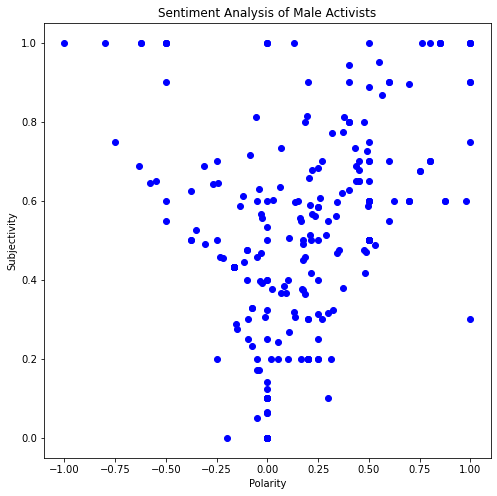

In [22]:
plt.figure(figsize = (8,8))
for i in range(0, maleActivist.shape[0]):
    plt.scatter(maleActivist['Polarity'][i], maleActivist['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis of Male Activists')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [23]:
maleNonActivist = pd.read_csv('maleNONActivist.txt')

Text(0, 0.5, 'Subjectivity')

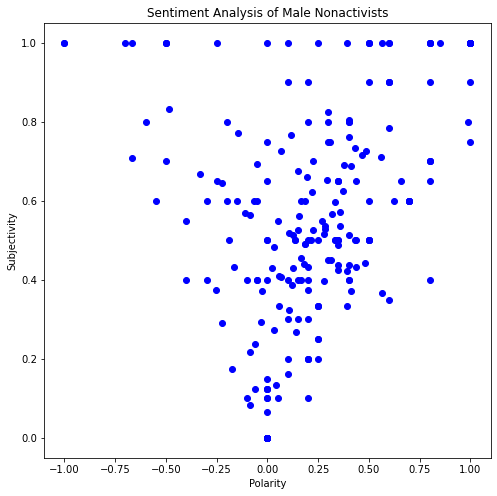

In [24]:
plt.figure(figsize = (8,8))
for i in range(0, maleNonActivist.shape[0]):
    plt.scatter(maleNonActivist['Polarity'][i], maleNonActivist['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis of Male Nonactivists')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [25]:
femaleActivist = pd.read_csv('femaleActivist.txt')

Text(0, 0.5, 'Subjectivity')

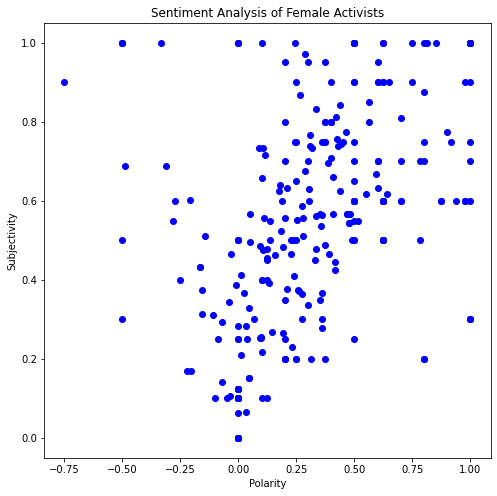

In [26]:
plt.figure(figsize = (8,8))
for i in range(0, femaleActivist.shape[0]):
    plt.scatter(femaleActivist['Polarity'][i], femaleActivist['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis of Female Activists')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [27]:
femaleNonActivist = pd.read_csv('femaleNONActivist.txt')

Text(0, 0.5, 'Subjectivity')

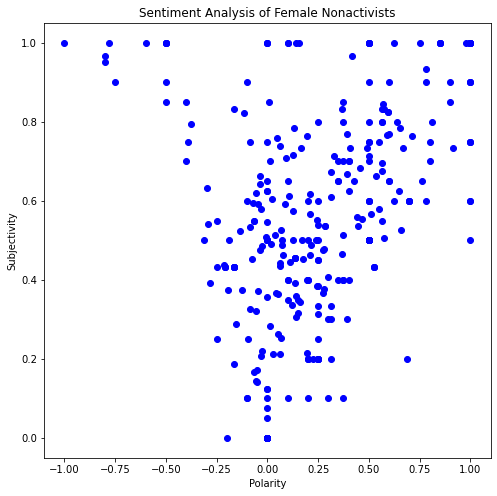

In [28]:
plt.figure(figsize = (8,8))
for i in range(0, femaleNonActivist.shape[0]):
    plt.scatter(femaleNonActivist['Polarity'][i], femaleNonActivist['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis of Female Nonactivists')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [29]:
# finding the sentiment analysis for all users
sentAnalysisAll = pd.concat([maleActivist, maleNonActivist, femaleActivist, femaleNonActivist], ignore_index=True)
sentAnalysisAll

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Positive,0.500000,False,0.700000,987949034911383552,-0.2732,21456548,1490320680831037443,0.141,0.763,0.096,ON THE RECORD - defund police/soft on crime -...,Mention,Male,True
1,1,Positive,0.400000,True,0.944444,1416120591095148550,0.6249,21456548,1490186908202422276,0.000,0.812,0.188,You're correct. Let's make sure to vote them...,Mention,Male,True
2,2,Positive,0.050000,False,0.241667,1416120591095148550,0.5719,21456548,1490169182599659521,0.000,0.879,0.121,"""Political Discourse"" is what they say it is ...",Mention,Male,True
3,3,Negative,-0.078125,False,0.328125,16795628,-0.1280,21456548,1489877425567809541,0.061,0.939,0.000,": : What does ""legitimate political discourse""...",Mention,Male,True
4,4,Neutral,0.000000,False,0.100000,1276279148,0.4019,21456548,1489767623646605319,0.000,0.828,0.172,"I think to them it means ""any expression in f...",Mention,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,495,Neutral,0.000000,False,0.000000,19084659,-0.6249,243690703,1510605301271068672,0.215,0.785,0.000,"He should be, violence is never the an...",Mention,Female,False
1814,496,Negative,-0.500000,False,1.000000,80366372,-0.1306,243690703,1510603043737411591,0.095,0.794,0.111,Will Smith's slap shows he's not perfect. No o...,Mention,Female,False
1815,497,Negative,-0.166667,False,0.433333,1336988466173906944,0.1027,243690703,1510599951323119625,0.082,0.821,0.096,"Since May 16, 1929, 20 Oscars have bee...",Mention,Female,False
1816,498,Neutral,0.000000,False,0.000000,21063394,0.0000,243690703,1510597393196060676,0.000,1.000,0.000,[dislike],Mention,Female,False


<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

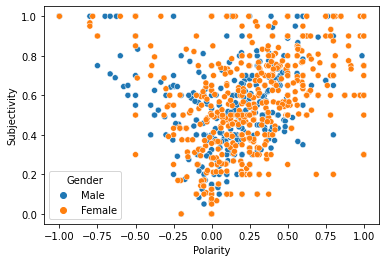

In [30]:
sns.scatterplot(data=sentAnalysisAll, x="Polarity", y="Subjectivity", hue = "Gender")

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

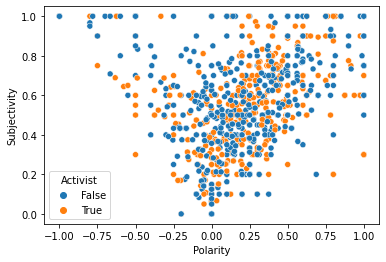

In [31]:
sns.scatterplot(data=sentAnalysisAll, x="Polarity", y="Subjectivity", hue = "Activist")

In [35]:
categoryWords = {'Belitting': ['b00bs', 'becky', 'big ass', 'bint', 'bints', 'bird', 'birds', 'boob', 'boobies', 'boobs', 'booobs', 'boooobs',
        'booooobs', 'booooooobs', 'camel toe', 'chesticles', 'cock waffle', 'dumb', 'dumbass', 'f4nny', 'failure',
        'fanny', 'fannyflaps', 'female', 'femoid', 'fho', 'fugly', 'funfuck', 'muff', 'pearlnecklace', 'peehole',
        'pissflaps', 'poon', 'poonani', 'poontang', 'pornprincess', 'pua', 'puntang', 'puss', 'pussylips', 'roastie',
        'shit heel', 'shit heels', 'short fuck', 'skin flute', 'smv', 'snowflake', 'spermhearder', 'spermherder',
        'stacy', 't1tt1e5', 't1tties', 'tittie', 'titties', 'titty', 'tittyfuck', 'unfuckable', 'va-j-j'],
'Flipping the narrative' : ['beta', 'mgtow', 'mra', 'normie', 'overthrow', 'prevail', 'vanquish'],
'Homophobia' : ['analannie', 'ass cowboy', 'ass jacker', 'ass whore', 'ass-assinate', 'ass-jabber', 'ass-pirate', 'assbandit',
        'assbanger', 'assblaster', 'assfuck', 'assfucker', 'asshopper', 'assklown', 'asslick', 'asslicker', 'assman',
        'asspacker', 'asspuppy', 'assranger', 'asssucker', 'backdoor man', 'ball licker', 'bulldike', 'bulldyke',
        'bunny fucker', 'butchdyke', 'butt fucker', 'butt pirate', 'buttbang', 'buttfuck', 'buttfucka', 'buttpirate',
        'c0cksucker', 'carpet muncher', 'cock cowboy', 'cock jockey', 'cock licker', 'cock smoke', 'cock suck',
        'cock-sucker', 'cockmunch', 'cockmuncher', 'cockqueen', 'cockrider', 'cocksman', 'cocksmith', 'cocksmoker',
        'cocksniffer', 'cocksuck', 'cocksucked', 'cocksucker', 'cocksucking', 'cocksucks', 'cocksuka', 'cocksukka',
        'cokmuncher', 'coksucka', 'cuntfucker', 'cuntlick', 'cuntlicker', 'cuntlicking', 'dick licker', 'dickfuck',
        'dickfucker', 'dicklick', 'dickman', 'dickmonger', 'dicksucker', 'dyke', 'dyke jumper', 'dyke jumpers', 'dykes',
        'fag', 'fagfucker', 'fagging', 'faggitt', 'faggot', 'faggs', 'fagot', 'fagots', 'fags', 'fanny fucker',
        'fannyfucker', 'fingerfucker', 'fingerfuckers', 'fistfucker', 'fistfuckers', 'fudge packer', 'fudgepacker',
        'gayass', 'gaybob', 'gaydo', 'gayfuck', 'gayfuckist', 'gaylord', 'gaysex', 'gaytard', 'gaywad', 'homo',
        'muffdive', 'muffindiver', 'mufflikcer', 'nob jokey', 'nobhead', 'nobjocky', 'nobjokey', 'penisbanger',
        'penisfucker', 'penispuffer', 'polesmoker', 'pussyeater', 'pussyfucker', 'pussylicker', 'pussylicking',
        'pussylover', 'pussypounder', 'queer', 'queers', 'rimjaw', 'sodomite', 'lez', 'lezbo', 'lezz', 'lezzie', 'lezzo'],
'Hostility' : ['ass-hat', 'assbag', 'assbite', 'asscock', 'assface', 'asshat', 'asshead', 'asshole', 'assshit', 'asswipe',
        'awalt', 'b!tch', 'b17ch', 'b1tch', 'bad fuck', 'balls', 'banging', 'bastard', 'beastiality', 'beat', 'beaver',
        'bi+ch', 'biatch', 'big butt', 'bitch', 'bitch ass', 'bitcher', 'bitchers', 'bitches', 'bitchtits', 'bite me',
        'blockhead', 'blockheads', 'boang', 'bogan', 'bogans', 'bottom-feeder', 'brotherfucker', 'butterhead',
        'butterheads', 'buttface', 'byatch', 'cause pain', 'chav', 'chavs', 'cheese eating surrender monkey',
        'cheese eating surrender monkies', 'clitface', 'cock knob', 'cockbite', 'cockblocker', 'cockhead', 'cockmaster',
        'cockmongler', 'cocknose', 'cocknugget', 'conchuda', 'conchudas', 'coochie', 'coochy', 'crotchrot',
        'cum bubble', 'cum guzzler', 'cum jockey', 'cum tart', 'cumdumpster', 'cumquat', 'cumqueen', 'cumslut', 'cunt',
        'cunt rag', 'cuntass', 'cuntface', 'cuntfuck', 'cunthole', 'cuntlick', 'cunts', 'cuntslut', 'demonrats',
        'dick beaters', 'dick for brains', 'dick weasel', 'dick wod', 'dickbag', 'dickbrain', 'dickface',
        'dickless', 'dicktickler', 'dickwad', 'dickweed', 'dingo fucker', 'dingo fuckers', 'dipshit', 'dipstick',
        'douche', 'douchebag', 'dum ass', 'dumb fuck', 'dumbass', 'dumbbitch', 'dumbfuck', 'eat me', 'eat pussy',
        'entrap', 'ewalt', 'extort', 'fastfuck', 'fatass', 'felcher', 'feltcher', 'finger fucker', 'fingerfuckers',
        'fist fuck', 'fistfucker', 'footfucker', 'fucka', 'fuckable', 'fuckass', 'fuckbag', 'fuckboy', 'fuckbrain',
        'fuckbuddy', 'fucker', 'fuckers', 'fuckersucker', 'fuckface', 'fuckfest', 'fuckfreak', 'fuckfriend', 'fuckhead',
        'fuckher', 'fuckina', 'fuckingbitch', 'fuckit', 'fuckknob', 'fuckpig', 'fucktard', 'fuckup',
        'fuckwhore', 'fuckyou', 'gangbanger', 'gash', 'gashes', 'greaseball', 'harm', 'hate', 'hayseed', 'hick',
        'hicks', 'hillbilly', 'ho', 'hoar', 'hoare', 'hoe', 'hoer', 'hoes', 'honkey', 'honky', 'hoodrat', 'hoodrats',
        'hore', 'hos', 'hurt', 'hussy', 'idiot', 'idiots', 'intimidate', 'jackass', 'kunt', 'l3i+ch', 'l3itch',
        'lardass', 'libtards', 'limpdick', 'menace', 'milf', 'minge', 'mock',
        'mocks', 'moron', 'mothafuck', 'mothafucka', 'mothafuckas', 'mothafuckaz', 'mothafucked', 'mothafucker',
        'mothafuckers', 'mothafucks', 'mother fucker', 'motherfuck',
        'motherfucked', 'motherfucker', 'motherfuckers', 'motherfuckings',
        'motherfuckka', 'motherfucks', 'muthafecker', 'muthafuckker', 'mutherfucker', 'nutsack', 'paleface',
        'palefaces', 'panooch', 'peckerwood', 'pindick', 'pohm', 'pohms', 'poor white trash', 'pu55i', 'pu55y',
        'punish', 'pusse', 'pussi', 'pussie', 'pussies', 'pussy', 'pussys', 'pusy', 'queerhole', 'redneck', 'rednecks',
        'rentafuck', 'retard', 'retarded', 'russellite', 'russellites', 'scag', 'scags', 'scumbag', 'seppo', 'seppos',
        'sheepfucker', 'sheepfuckers', 'shit kicker', 'shit kickers', 'shitface', 'shithead', 'shitspitter',
        'skag', 'skags', 'skank',
        'skank bitch', 'skank fuck', 'skank whore', 'skanky', 'skanky bitch', 'skanky whore', 'skullfuck', 'slag',
        'slags', 'slit', 'slits', 'slut', 'slut wear', 'slut whore', 'slutbag', 'sluts', 'slutt', 'slutting', 'slutty',
        'slutwhore', 'smear', 'snatch', 'son-of-a-bitch', 'spermbag', 'sub human', 'sub humans', 'suckme', 'suckmytit',
        'tard', 'terrorize', 'threaten', 'thrust', 'titfucker', 'titfuckin', 'trailertrash', 'trisexual', 'turd',
        'tw4t', 'twat', 'twathead', 'twats', 'twatty', 'twatwaffle', 'twobitwhore', 'twunt', 'twunter', 'wanker',
        'wasp', 'wasps', 'waspy', 'white trash', 'whitey', 'whities', 'whoar', 'whore', 'whore from fife',
        'whore from fifes', 'whorefucker', 'whores', 'williewanker', 'wuss', 'yankee'],
'Patriarchy' : ['amog', 'betabuxx', 'compel', 'oblige', 'omega', 'overwhelm', 'subjugate', 'suppress'],
'Physical Violence' : ['annihilate', 'assail', 'assassinate', 'assault', 'attack', 'bang', 'batter', 'blast', 'block', 'bring down',
        'bruise', 'brutalise', 'burn', 'bust', 'butcher', 'carry off', 'choke', 'clobber', 'concuss', 'constrain',
        'crack', 'crush', 'cut', 'decimate', 'demolish', 'destroy', 'dispose of', 'drown', 'enslave', 'er',
        'exterminate', 'finish off', 'flagellate', 'force', 'gag', 'hit', 'jump', 'kick', 'kill', 'lock up', 'maul',
        'murder', 'obliterate', 'pelt', 'plunk', 'pounce upon', 'pummel', 'punch', 'raid', 'ram', 'shake', 'shake down',
        'shoot ', 'shove', 'slam', 'slap', 'slaughter', 'slog', 'smack', 'smash', 'smother', 'stab', 'strangle',
        'strike', 'strong-arm', 'thrash', 'thresh', 'thwack', 'trample', 'trounce', 'vaporize', 'wallop', 'whip'],
'Racism' : ['abbo', 'abbos', 'abo', 'abos', 'african catfish', 'african catfishes', 'african forklift', 'africoon',
        'africoons', 'afro-saxon', 'afro-saxons', 'albino', 'albinos', 'alligator bait', 'alligator baits', 'americoon',
        'americoons', 'amo', 'amos', 'anglo', 'anglos', 'arab', 'argie', 'argies', 'armo', 'armos', 'assnigger',
        'aunt jemima', 'aunt jemimas', 'bamboo coon', 'bamboo coons', 'banana bender', 'banana benders',
        'banana lander', 'banana landers', 'banjo lips', 'bans and cans', 'beach nigger', 'beach niggers',
        'bean dipper', 'bean dippers', 'beaner', 'beaner shnitzel', 'beaner shnitzels', 'beaners', 'beaney', 'beanies',
        'bhrempti', 'bhremptis', 'bigger', 'bix nood', 'bix noods', 'black', 'black barbie', 'black barbies',
        'black dago', 'black dagos', 'blaxican', 'blaxicans', 'bluegum', 'bluegums', 'bog hopper', 'bog hoppers',
        'bog irish', 'bog irishes', 'bog jumper', 'bog jumpers', 'bog trotter', 'bog trotters', 'bohunk', 'booner',
        'booners', 'boong', 'boonga', 'boongas', 'boongs', 'boonie', 'boonies', 'border bunnies', 'border bunny',
        'border hoppers', 'border nigger', 'border niggers', 'buckethead', 'bucketheads', 'buckra', 'buckras',
        'buckwheat', 'buckwheats', 'buddhahead', 'buddhaheads', 'buffie', 'buffies', 'bug eater', 'bug eaters',
        'buk buk', 'buk buks', 'bung', 'bunga', 'bungas', 'bungs', 'burrhead', 'burrheads', 'cab nigger', 'cab niggers',
        'camel cowboies', 'camel cowboy', 'camel fucker', 'camel fuckers', 'camel humper', 'camel humpers',
        'camel jacker', 'camel jackers', 'camel jockey', 'can eater', 'can eaters', 'canuck', 'carpet pilot',
        'carpet pilots', 'carrot snapper', 'carrot snappers', 'caublasian', 'caublasians', 'cave nigger',
        'cave niggers', 'charva', 'charvas', 'chigger', 'chiggers', 'chili shitter', 'chili shitters', 'chinaman',
        'chinc', 'chinese wetback', 'chinese wetbacks', 'ching chong', 'ching chongs', 'chinig', 'chinigs', 'chink',
        'chink a billies', 'chink a billy', 'chinks', 'chinky', 'chonkies', 'chonky', 'christ killer', 'christ killers',
        'chug', 'chugs', 'clamhead', 'clamheads', 'clog wog', 'coolie', 'coolies', 'coon', 'coondog', 'coons',
        'cow kisser', 'cow kissers', 'cowboy killer', 'cowboy killers', 'cracker', 'crackers', 'cunteyed',
        'curry slurper', 'curry slurpers', 'curry stinker', 'curry stinkers', 'cushi', 'cushis', 'cushite', 'cushites',
        'dago', 'dagos', 'darkey', 'darkie', 'darkies', 'darky', 'dego', 'degos', 'diaper head', 'diaper heads',
        'dinge', 'dinges', 'dogun', 'doguns', 'dot head', 'dot heads', 'dune coon', 'dune coons', 'dune nigger',
        'dune niggers', 'eskimo', 'eyetie', 'eyeties', 'fob', 'fobs', 'fog nigger',
        'fog niggers', 'fresh off the boat', 'fresh off the boats', 'gator bait', 'gator baits', 'gerudo', 'gerudos',
        'gew', 'gews', 'ghetto hamster', 'ghetto hamsters', 'gin jockey', 'gin jockies', 'ginzo', 'ginzos', 'gipp',
        'gippo', 'gippos', 'gipps', 'gipsy', 'golliwog', 'golliwogs', 'gook', 'gook eye', 'gook eyes', 'gookies',
        'gooks', 'gooky', 'goy', 'goyim', 'greaser', 'greasers', 'gringo', 'groid', 'groids', 'guala guala',
        'guala gualas', 'gub', 'gubba', 'gubbas', 'gubs', 'guido', 'guidos', 'gurrier', 'gurriers', 'gwat', 'gwats',
        'gyppie', 'gyppies', 'gyppy', 'gypsy', 'hairyback', 'hairybacks', 'half-breed', 'half-caste', 'halfrican',
        'halfricans', 'haole', 'hapa', 'hebe', 'hebes', 'hebro', 'hebros', 'heeb', 'heebs', 'heinie', 'heinies',
        'higger', 'higgers', 'hindoo', 'hodgie', 'honyak', 'honyaks', 'honyock', 'honyocks', 'hoosier', 'hoosiers',
        'hun', 'hunkie', 'hunkies', 'hunky', 'huns', 'hunyak', 'hunyaks', 'hunyock', 'hunyocks', 'hymie', 'hymies',
        'ice monkey', 'ice monkies', 'ice nigger', 'ice niggers', 'ike', 'ikes', 'ikey', 'ikey mo', 'ikey mos', 'ikies',
        'iky', 'injun', 'injuns', 'island nigger', 'island niggers', 'jant', 'jants', 'jap', 'japie', 'japies', 'japs',
        'jewbacca', 'jewbaccas', 'jhant', 'jhants', 'jig', 'jiga', 'jigaboo', 'jigarooni', 'jigaroonis', 'jigg',
        'jigga', 'jiggabo', 'jiggabos', 'jiggas', 'jigger', 'jiggers', 'jiggs', 'jigs', 'jijjiboo', 'jijjiboos',
        'jimfish', 'jockie', 'jockies', 'jocky', 'junglebunny', 'kaffir', 'kafir', 'khazar', 'khazars', 'kike', 'kikes',
        'kotiya', 'kotiyas', 'kraut', 'krauts', 'kushi', 'kushis', 'kushite', 'kushites', 'kyke', 'kykes', 'latrino',
        'latrinos', 'lawn jockey', 'lawn jockies', 'leb', 'lebbo', 'lebbos', 'lebs', 'lemonhead', 'lemonheads',
        'leprechaun', 'leprechauns', 'ling ling', 'ling lings', 'lowlander', 'lowlanders', 'lubra', 'lubras', 'lugan',
        'lugans', 'makwerekwere', 'mammy', 'mangia cake', 'mangia cakes', 'mick', 'micks', 'mockey', 'mockie',
        'mockies', 'mocky', 'moke', 'mokes', 'mokies', 'moky', 'mook', 'mooks', 'mooncricket', 'moss eater',
        'moss eaters', 'mosshead', 'mossheads', 'moulie', 'moulies', 'moulignon', 'moulignons', 'moulinyan',
        'moulinyans', 'mud person', 'mud persons', 'mud shark', 'mud sharks', 'muk', 'muks', 'muktuk', 'muktuks',
        'mulato', 'mulatos', 'mulatto', 'mulignan', 'mulignans', 'mutt', 'mutts', 'n1gga', 'n1gger', 'negress', 'negro',
        'negroes', 'negroid', 'negros', 'net head', 'net heads', 'nichi', 'nichis', 'nichiwa', 'nichiwas', 'nig',
        'nigaboo', 'nigar', 'nigars', 'niger', 'nigers', 'nigette', 'nigettes', 'nigg', 'nigg3r', 'nigg4h', 'nigga',
        'niggah', 'niggas', 'niggaz', 'nigger', 'niggers', 'niggor', 'niggors', 'niggur', 'niglet', 'nignog', 'nigor',
        'nigors', 'nigr', 'nigra', 'nigras', 'nigre', 'nigres', 'nitchee', 'nitchees', 'nitchie', 'nitchies', 'nitchy',
        'nlgger', 'nlggor', 'northern monkey', 'northern monkies', 'ocker', 'ockers', 'octaroon', 'octaroons', 'ofaies',
        'ofay', 'oriental', 'orientals', 'paddies', 'paddy', 'pakeha', 'paki', 'pakis', 'pancake face', 'pancake faces',
        'papist', 'papists', 'picaninny', 'pickaninnies', 'pickaninny', 'piker', 'pikers', 'pikies', 'piky',
        'pineapple nigger', 'pineapple niggers', 'ping pang', 'ping pangs', 'pocho', 'pocohantas', 'pogue', 'pogues',
        'pohm', 'polack', 'polacks', 'pollock', 'pommy', 'popolo', 'popolos', 'poppadom', 'poppadoms', 'porch monkey',
        'porchmonkey', 'prairie nigger', 'prairie niggers', 'proddy dog', 'proddy dogs', 'proddywhoddies',
        'proddywhoddy', 'proddywoddies', 'proddywoddy', 'pygmy', 'quadroon', 'quadroons', 'raghead', 'red indian',
        'redlegs', 'redskin', 'redskins', 'rhine monkey', 'rhine monkies', 'roofucker', 'roofuckers', 'roundeye',
        'roundeyes', 'ruski', 'sambo', 'sambos', 'sand niggerette', 'sand niggerettes', 'sandnigger', 'scallie',
        'scallies', 'scally', 'scanger', 'scangers', 'semihole', 'semiholes', 'senga', 'sengas', 'seppo',
        'shanty irish', 'shanty irishes', 'sheister', 'sheisters', 'sheltas', 'shylock', 'shylocks', 'shyster',
        'shysters', 'sideways pussies', 'sideways pussy', 'skanger', 'skangers', 'slant', 'slant eye', 'slant eyes',
        'slants', 'slopehead', 'slopeheads', 'slopies', 'smoke jumper', 'smoke jumpers', 'snownigger', 'sooties',
        'sooty', 'soup taker', 'soup takers', 'southern fairies', 'southern fairy', 'spaghettibender',
        'spaghettinigger', 'spic', 'spice nigger', 'spice niggers', 'spick', 'spickaboo', 'spickaboos', 'spicks',
        'spics', 'spide', 'spides', 'spig', 'spigger', 'spiggers', 'spigotties', 'spigotty', 'spigs', 'spik', 'spiks',
        'spink', 'spinks', 'spiv', 'spivs', 'spook', 'spooks', 'squaw', 'squaws', 'steek', 'steeks', 'stump jumper',
        'stump jumpers', 'taffy', 'teabagger', 'teabaggers', 'thicklips', 'timber nigger', 'timber niggers',
        'timbernigger', 'tinkard', 'tinkards', 'touch of the tar brush', 'touch of the tar brushes', 'towel head',
        'towel heads', 'towelhead', 'tree jumper', 'tree jumpers', 'tunnel digger', 'tunnel diggers', 'tyncar',
        'tyncars', 'tynekere', 'tynekeres', 'tynkard', 'tynkards', 'tynkare', 'tynkares', 'tynker', 'tynkere',
        'tynkeres', 'tynkers', 'uncircumcised baboon', 'uncircumcised baboons', 'uncle tom', 'velcro head',
        'velcro heads', 'wagon burner', 'wagon burners', 'wetback', 'wexican', 'wexicans', 'whigger', 'white nigger',
        'white niggers', 'whitenigger', 'wiggerette', 'wiggerettes', 'wog', 'wogs', 'wop', 'wops', 'yellowman', 'yid',
        'zigabo', 'zigabos', 'zipperhead', 'zipperheads', 'zippohead', 'zippoheads', 'zog', 'zog lover', 'zog lovers',
        'zogs', 'sideways cooter', 'sideways cooters', 'sideways vagina', 'sideways vaginas'],
'Sexual Violence' : ['cherry popper', 'clitfuck', 'cock block', 'cock carousel', 'cock tease', 'conquer', 'gangbang', 'gangbanged',
        'gangbangs', 'incest', 'infiltrate', 'insest', 'lolita', 'molest', 'molestation', 'pound', 'rape', 'sodomise',
        'sodomize', 'spank', 'unclefucker', 'virginbreaker'],
'Stoicism' : ['blackops2cel', 'blackpill', 'chad', 'cope', 'cuck', 'currycel', 'fakecel', 'friendless', 'fuel', 'gymcel',
        'handholdless', 'heightcel', 'hugless', 'hypergamy', 'incel', 'jbw', 'jfl', 'kissless', 'kthhfv', 'ldar',
        'looksmatch', 'looksmaxx', 'meeks', 'mogs', 'redpill', 'ricecel', 'rope', 'touchless', 'truecel', 'tyrone',
        'volcel', 'wagecel', 'wristcel']}

In [36]:
# empty count
negWordCount = {'Belitting': 0, 'Flipping the narrative': 0, 'Homophobia': 0, 'Hostility': 0, 'Patriarchy': 0,
                'Physical Violence': 0 , 'Racism': 0, 'Sexual Violence': 0, 'Stoicism' :0}
# empty lists to store words by category
belittingWords = []
narrativeWords = []
homophobicWords = []
hostilityWords = []
patriarchyWords = []
violentWords = []
racistWords = []
sexualViolenceWords = []
stoicismWords = []

In [37]:
#counting the mentioned negative words and storeing them in the empty lists
def negativeLang(txt):
    sentence = txt
    txt_words = [word for word in sentence.split()]
    for word in txt_words:
        if word in categoryWords['Belitting']:
            negWordCount['Belitting'] = negWordCount.get('Belitting') + 1
            belittingWords.append(word)
        elif word in categoryWords['Flipping the narrative']:
            negWordCount['Flipping the narrative'] = negWordCount.get('Flipping the narrative') + 1
            narrativeWords.append(word)
        elif word in categoryWords['Homophobia']:
            negWordCount['Homophobia'] = negWordCount.get('Homophobia') + 1
            homophobicWords.append(word)
        elif word in categoryWords['Hostility']:
            negWordCount['Hostility'] = negWordCount.get('Hostility') + 1
            hostilityWords.append(word)
        elif word in categoryWords['Patriarchy']:
            negWordCount['Patriarchy'] = negWordCount.get('Patriarchy') + 1
            patriarchyWords.append(word)
        elif word in categoryWords['Physical Violence']:
            negWordCount['Physical Violence'] = negWordCount.get('Physical Violence') + 1
            violentWords.append(word)
        elif word in categoryWords['Racism']:
            negWordCount['Racism'] = negWordCount.get('Racism') + 1
            racistWords.append(word)
        elif word in categoryWords['Sexual Violence']:
            negWordCount['Sexual Violence'] = negWordCount.get('Sexual Violence') + 1
            sexualViolenceWords.append(word)
        elif word in categoryWords['Stoicism']:
            negWordCount['Stoicism'] = negWordCount.get('Stoicism') + 1
            stoicismWords.append(word)

In [38]:
# for this example we are using the female activist tweets
femaleActivist['text'].apply(negativeLang)

0      None
1      None
2      None
3      None
4      None
       ... 
480    None
481    None
482    None
483    None
484    None
Name: text, Length: 485, dtype: object

In [40]:
negWordCount

{'Belitting': 0,
 'Flipping the narrative': 0,
 'Homophobia': 0,
 'Hostility': 2,
 'Patriarchy': 0,
 'Physical Violence': 3,
 'Racism': 1,
 'Sexual Violence': 0,
 'Stoicism': 1}

In [41]:
print(belittingWords + narrativeWords + homophobicWords + hostilityWords + patriarchyWords + violentWords + racistWords + 
      sexualViolenceWords + stoicismWords)

['hate', 'hate', 'force', 'destroy', 'block', 'black', 'fuel']


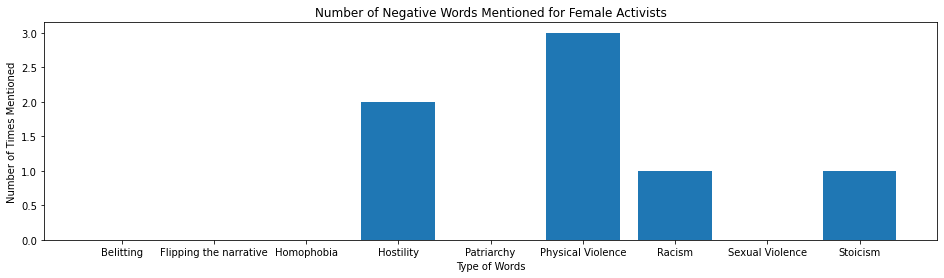

In [43]:
plt.figure(figsize = (16,4))
names = list(negWordCount.keys())
values = list(negWordCount.values())

plt.bar(range(len(negWordCount)), values, tick_label=names)
plt.title('Number of Negative Words Mentioned for Female Activists')
plt.xlabel('Type of Words')
plt.ylabel('Number of Times Mentioned')
plt.show()

In [45]:
# loading the rest of the datasets
femaleNONActivist = pd.read_table('femaleNONActivist.txt', sep=',')
femaleNONActivist

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Neutral,0.000000,False,0.000000,435281513,0.0000,738392410288447488,1475617040165752833,0.000,1.000,0.000,bUt COvId dOeSn't AFfecT ChIlDrEN,Mention,Female,False
1,1,Negative,-0.291667,False,0.541667,304128769,-0.0258,738392410288447488,1475616428707532800,0.149,0.747,0.104,"Thank you, Doctor, for your hard work and ded...",Mention,Female,False
2,2,Neutral,0.000000,False,0.000000,962235107292729345,0.0000,738392410288447488,1475616364752683010,0.000,1.000,0.000,bootlicker,Mention,Female,False
3,3,Neutral,0.000000,False,0.000000,1386700512893018114,0.3570,738392410288447488,1475616215167025154,0.000,0.784,0.216,Not arguing the vax and booster,Mention,Female,False
4,4,Positive,0.089286,False,0.707672,963508033,0.7603,738392410288447488,1475615461882699780,0.054,0.769,0.177,Pretty sure that’s how my family got it. We t...,Mention,Female,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Neutral,0.000000,False,0.000000,19084659,-0.6249,243690703,1510605301271068672,0.215,0.785,0.000,"He should be, violence is never the an...",Mention,Female,False
496,496,Negative,-0.500000,False,1.000000,80366372,-0.1306,243690703,1510603043737411591,0.095,0.794,0.111,Will Smith's slap shows he's not perfect. No o...,Mention,Female,False
497,497,Negative,-0.166667,False,0.433333,1336988466173906944,0.1027,243690703,1510599951323119625,0.082,0.821,0.096,"Since May 16, 1929, 20 Oscars have bee...",Mention,Female,False
498,498,Neutral,0.000000,False,0.000000,21063394,0.0000,243690703,1510597393196060676,0.000,1.000,0.000,[dislike],Mention,Female,False


In [46]:
maleActivist = pd.read_table('maleActivist.txt', sep=',')
maleActivist

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Positive,0.500000,False,0.700000,987949034911383552,-0.2732,21456548,1490320680831037443,0.141,0.763,0.096,ON THE RECORD - defund police/soft on crime -...,Mention,Male,True
1,1,Positive,0.400000,True,0.944444,1416120591095148550,0.6249,21456548,1490186908202422276,0.000,0.812,0.188,You're correct. Let's make sure to vote them...,Mention,Male,True
2,2,Positive,0.050000,False,0.241667,1416120591095148550,0.5719,21456548,1490169182599659521,0.000,0.879,0.121,"""Political Discourse"" is what they say it is ...",Mention,Male,True
3,3,Negative,-0.078125,False,0.328125,16795628,-0.1280,21456548,1489877425567809541,0.061,0.939,0.000,": : What does ""legitimate political discourse""...",Mention,Male,True
4,4,Neutral,0.000000,False,0.100000,1276279148,0.4019,21456548,1489767623646605319,0.000,0.828,0.172,"I think to them it means ""any expression in f...",Mention,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,426,Positive,0.137037,True,0.598148,48925204,-0.1430,18137417,1511403796307628040,0.202,0.638,0.159,... accusations running rampant wo full conte...,Mention,Male,True
427,427,Positive,0.029762,False,0.601190,48925204,-0.5859,18137417,1511403357621174274,0.134,0.828,0.037,Yes. there are other aspects too- when those ...,Mention,Male,True
428,428,Negative,-0.235714,False,0.457143,1163723022,-0.4927,18137417,1511373965511507972,0.242,0.758,0.000,_mirya I don’t see a single non research uni....,Mention,Male,True
429,429,Positive,0.312500,False,0.200000,15185020,0.8652,18137417,1511366364417646599,0.000,0.292,0.708,Thanks for sharing Hakeem. And congrats!!,Mention,Male,True


In [47]:
maleNONActivist = pd.read_table('maleNONActivist.txt', sep=',')
maleNONActivist

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Positive,0.136364,False,0.50,57243327,0.0000,46571486,1513959580132282370,0.000,1.000,0.000,Who’s going to live tweet theresident episode...,Mention,Male,False
1,1,Positive,0.437500,False,0.65,1297411020852355072,0.4753,46571486,1513947764589166593,0.000,0.877,0.123,The true image of Hannibal!\n ...,Mention,Male,False
2,2,Neutral,0.000000,False,0.00,123599183,0.0000,46571486,1513885620682342411,0.000,1.000,0.000,_wade _ _herrera17 _Morgann h...,Mention,Male,False
3,3,Negative,-0.700000,True,1.00,84177968,-0.5106,46571486,1513858292556177413,0.355,0.645,0.000,I remember that ugly shirt episode 😆,Mention,Male,False
4,4,Neutral,0.000000,False,0.00,46662532,0.0000,46571486,1513850669748391937,0.000,1.000,0.000,Watch Preview For ‘The Resident’ Tuesday https...,Mention,Male,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,397,Positive,1.000000,False,1.00,27864496,0.6114,344955115,1515795826546782215,0.000,0.334,0.666,Happy Curmudgeoning!,Mention,Male,False
398,398,Positive,0.800000,False,1.00,844386235493732353,0.5719,344955115,1515795770074550272,0.000,0.351,0.649,Happy bonging,Mention,Male,False
399,399,Positive,0.800000,False,1.00,1242935575709171714,0.5719,344955115,1515795293303934985,0.000,0.684,0.316,Happy Passover Lewis- to you and your family❤️,Mention,Male,False
400,400,Positive,1.000000,False,1.00,781246423,0.6249,344955115,1515795118787379209,0.000,0.196,0.804,Awesome,Mention,Male,False


In [48]:
femaleData = pd.concat([femaleNONActivist, femaleActivist])
femaleData

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Neutral,0.000000,False,0.000000,435281513,0.0000,738392410288447488,1475617040165752833,0.000,1.000,0.000,bUt COvId dOeSn't AFfecT ChIlDrEN,Mention,Female,False
1,1,Negative,-0.291667,False,0.541667,304128769,-0.0258,738392410288447488,1475616428707532800,0.149,0.747,0.104,"Thank you, Doctor, for your hard work and ded...",Mention,Female,False
2,2,Neutral,0.000000,False,0.000000,962235107292729345,0.0000,738392410288447488,1475616364752683010,0.000,1.000,0.000,bootlicker,Mention,Female,False
3,3,Neutral,0.000000,False,0.000000,1386700512893018114,0.3570,738392410288447488,1475616215167025154,0.000,0.784,0.216,Not arguing the vax and booster,Mention,Female,False
4,4,Positive,0.089286,False,0.707672,963508033,0.7603,738392410288447488,1475615461882699780,0.054,0.769,0.177,Pretty sure that’s how my family got it. We t...,Mention,Female,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,Positive,0.500000,True,0.250000,54356934,0.8374,536610418,1514302114633244677,0.000,0.729,0.271,Omg THANK YOU for naming the “whispering” abo...,Mention,Female,True
481,481,Neutral,0.000000,False,0.000000,17594077,0.0000,536610418,1514301836076924932,0.000,1.000,0.000,_Zuckerman . is about to explain th...,Mention,Female,True
482,482,Neutral,0.000000,False,0.000000,19374709,-0.6249,536610418,1514300313637122050,0.186,0.814,0.000,highlights the global impact of anti-Black ra...,Mention,Female,True
483,483,Positive,0.400000,False,0.800000,17594077,0.5106,536610418,1514299777181417473,0.000,0.887,0.113,_Zuckerman “Nobody is free until al...,Mention,Female,True


In [49]:
maleData = pd.concat([maleNONActivist, maleActivist])
maleData

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Positive,0.136364,False,0.500000,57243327,0.0000,46571486,1513959580132282370,0.000,1.000,0.000,Who’s going to live tweet theresident episode...,Mention,Male,False
1,1,Positive,0.437500,False,0.650000,1297411020852355072,0.4753,46571486,1513947764589166593,0.000,0.877,0.123,The true image of Hannibal!\n ...,Mention,Male,False
2,2,Neutral,0.000000,False,0.000000,123599183,0.0000,46571486,1513885620682342411,0.000,1.000,0.000,_wade _ _herrera17 _Morgann h...,Mention,Male,False
3,3,Negative,-0.700000,True,1.000000,84177968,-0.5106,46571486,1513858292556177413,0.355,0.645,0.000,I remember that ugly shirt episode 😆,Mention,Male,False
4,4,Neutral,0.000000,False,0.000000,46662532,0.0000,46571486,1513850669748391937,0.000,1.000,0.000,Watch Preview For ‘The Resident’ Tuesday https...,Mention,Male,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,426,Positive,0.137037,True,0.598148,48925204,-0.1430,18137417,1511403796307628040,0.202,0.638,0.159,... accusations running rampant wo full conte...,Mention,Male,True
427,427,Positive,0.029762,False,0.601190,48925204,-0.5859,18137417,1511403357621174274,0.134,0.828,0.037,Yes. there are other aspects too- when those ...,Mention,Male,True
428,428,Negative,-0.235714,False,0.457143,1163723022,-0.4927,18137417,1511373965511507972,0.242,0.758,0.000,_mirya I don’t see a single non research uni....,Mention,Male,True
429,429,Positive,0.312500,False,0.200000,15185020,0.8652,18137417,1511366364417646599,0.000,0.292,0.708,Thanks for sharing Hakeem. And congrats!!,Mention,Male,True


In [50]:
combineData = pd.concat([femaleData,maleData])
combineData

,Unnamed: 0,Analysis,Polarity,Profanity,Subjectivity,author id,compound,for,id,neg,neu,pos,text,type,Gender,Activist
0,0,Neutral,0.000000,False,0.000000,435281513,0.0000,738392410288447488,1475617040165752833,0.000,1.000,0.000,bUt COvId dOeSn't AFfecT ChIlDrEN,Mention,Female,False
1,1,Negative,-0.291667,False,0.541667,304128769,-0.0258,738392410288447488,1475616428707532800,0.149,0.747,0.104,"Thank you, Doctor, for your hard work and ded...",Mention,Female,False
2,2,Neutral,0.000000,False,0.000000,962235107292729345,0.0000,738392410288447488,1475616364752683010,0.000,1.000,0.000,bootlicker,Mention,Female,False
3,3,Neutral,0.000000,False,0.000000,1386700512893018114,0.3570,738392410288447488,1475616215167025154,0.000,0.784,0.216,Not arguing the vax and booster,Mention,Female,False
4,4,Positive,0.089286,False,0.707672,963508033,0.7603,738392410288447488,1475615461882699780,0.054,0.769,0.177,Pretty sure that’s how my family got it. We t...,Mention,Female,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,426,Positive,0.137037,True,0.598148,48925204,-0.1430,18137417,1511403796307628040,0.202,0.638,0.159,... accusations running rampant wo full conte...,Mention,Male,True
427,427,Positive,0.029762,False,0.601190,48925204,-0.5859,18137417,1511403357621174274,0.134,0.828,0.037,Yes. there are other aspects too- when those ...,Mention,Male,True
428,428,Negative,-0.235714,False,0.457143,1163723022,-0.4927,18137417,1511373965511507972,0.242,0.758,0.000,_mirya I don’t see a single non research uni....,Mention,Male,True
429,429,Positive,0.312500,False,0.200000,15185020,0.8652,18137417,1511366364417646599,0.000,0.292,0.708,Thanks for sharing Hakeem. And congrats!!,Mention,Male,True


In [54]:
polarityTwitterSelectMean = combineData.groupby('for')[['Polarity']].mean()
subjectivityTwitterSelectMean = combineData.groupby('for')[['Subjectivity']].mean()
polarityTwitterAllMean = combineData.groupby('author id')[['Polarity']].mean()

,Polarity
author id,
696113,-0.071429
3775651,0.000000
4902991,0.000000
6148642,-0.050000
7313362,0.000000
...,...
1516221542383984644,0.000000
1516646549685743616,0.288889
1516843349805875202,0.100000


In [55]:
top_ten_lowest = polarityTwitterAllMean.sort_values(['Polarity'],ascending=True).groupby('author id')
top_ten_lowest.head(5)

,Polarity
author id,
1418974808,-1.00000
1101113420764581888,-1.00000
313412582,-1.00000
3687922037,-0.78125
3434298399,-0.75000
...,...
27864496,1.00000
417001936,1.00000
245179984,1.00000


In [56]:
top_ten_highest = polarityTwitterAllMean.sort_values(['Polarity'],ascending=False).groupby('author id')
top_ten_highest.head(5)

,Polarity
author id,
1461457054904696832,1.00000
251933730,1.00000
937697642,1.00000
857997632513486848,1.00000
1423509083114639360,1.00000
...,...
790296900,-0.75000
3687922037,-0.78125
1101113420764581888,-1.00000


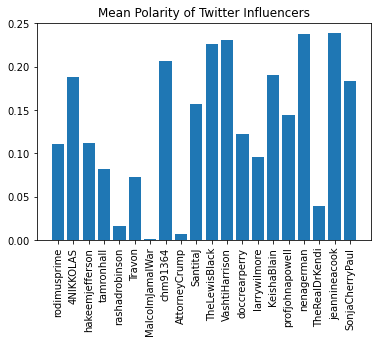

In [57]:
polarityTwitterSelectMean['users'] = ['rodimusprime','4NIKKOLAS','hakeemjefferson','tamronhall','rashadrobinson','Travon','MalcolmJamalWar','chm91364','AttorneyCrump','SantitaJ','TheLewisBlack','VashtiHarrison','doccrearperry','larrywilmore','KeishaBlain','profjohnapowell','nenagerman','TheRealDrKendi','jeannineacook','SonjaCherryPaul']
polarityTwitterSelectMean
fig = plt.figure()
plt.bar(polarityTwitterSelectMean['users'],polarityTwitterSelectMean['Polarity'])
plt.xticks(rotation='vertical')
plt.title('Mean Polarity of Twitter Influencers')
plt.show()

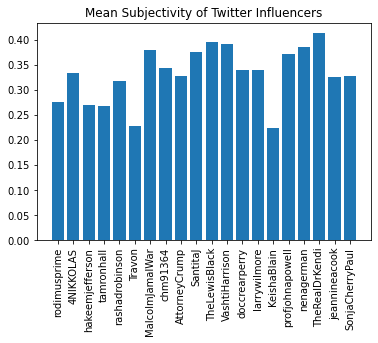

In [58]:
polarityTwitterSelectMean['users'] = ['rodimusprime','4NIKKOLAS','hakeemjefferson','tamronhall','rashadrobinson','Travon','MalcolmJamalWar','chm91364','AttorneyCrump','SantitaJ','TheLewisBlack','VashtiHarrison','doccrearperry','larrywilmore','KeishaBlain','profjohnapowell','nenagerman','TheRealDrKendi','jeannineacook','SonjaCherryPaul']
polarityTwitterSelectMean
fig = plt.figure()
plt.bar(polarityTwitterSelectMean['users'],subjectivityTwitterSelectMean['Subjectivity'])
plt.xticks(rotation='vertical')
plt.title('Mean Subjectivity of Twitter Influencers')
plt.show()

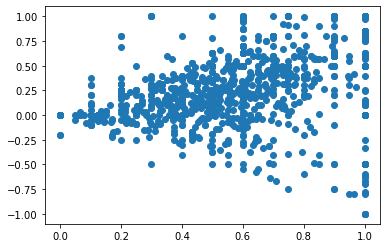

In [59]:
plt.scatter(combineData['Subjectivity'],combineData['Polarity'])
plt.show()

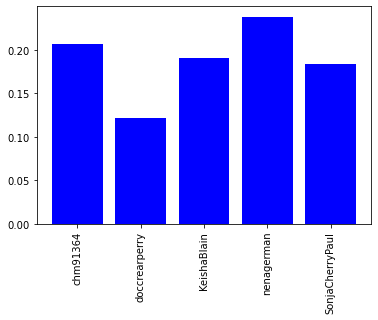

In [60]:
femaleAct = femaleActivist.groupby('for')[['Polarity']].mean()
femaleAct['user'] = ['chm91364','doccrearperry','KeishaBlain','nenagerman','SonjaCherryPaul']
fig = plt.figure()
plt.bar(femaleAct['user'],femaleAct['Polarity'], color = 'b')
plt.xticks(rotation='vertical')
plt.show()

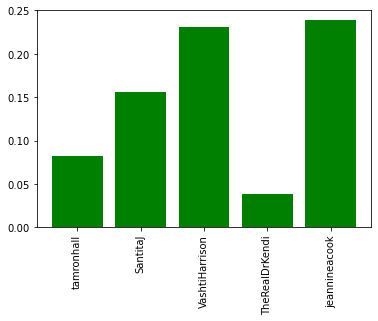

In [61]:
femaleNONAct = femaleNONActivist.groupby('for')[['Polarity']].mean()
femaleNONAct['user'] = ['tamronhall','SantitaJ','VashtiHarrison','TheRealDrKendi','jeannineacook']
fig = plt.figure()
plt.bar(femaleNONAct['user'],femaleNONAct['Polarity'],color = 'g')
plt.xticks(rotation='vertical')
plt.show()

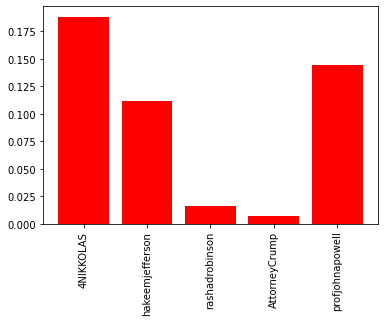

In [62]:
maleAct = maleActivist.groupby('for')[['Polarity']].mean()
maleAct['user'] = ['4NIKKOLAS','hakeemjefferson','rashadrobinson','AttorneyCrump','profjohnapowell']
fig = plt.figure()
plt.bar(maleAct['user'],maleAct['Polarity'],color = 'r')
plt.xticks(rotation='vertical')
plt.show()

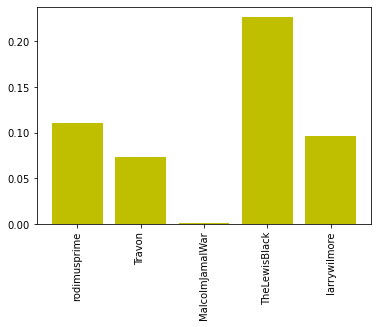

In [63]:
maleNONAct = maleNONActivist.groupby('for')[['Polarity']].mean()
maleNONAct['user'] = ['rodimusprime','Travon','MalcolmJamalWar','TheLewisBlack','larrywilmore']
fig = plt.figure()
plt.bar(maleNONAct['user'],maleNONAct['Polarity'],color = 'y')
plt.xticks(rotation='vertical')
plt.show()

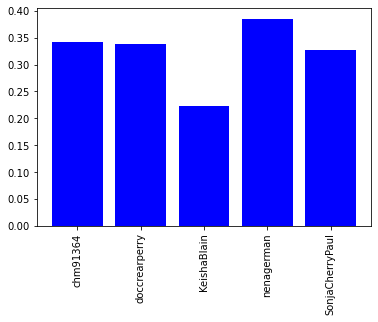

In [64]:
femaleAct = femaleActivist.groupby('for')[['Subjectivity']].mean()
femaleAct['user'] = ['chm91364','doccrearperry','KeishaBlain','nenagerman','SonjaCherryPaul']
fig = plt.figure()
plt.bar(femaleAct['user'],femaleAct['Subjectivity'], color = 'b')
plt.xticks(rotation='vertical')
plt.show()

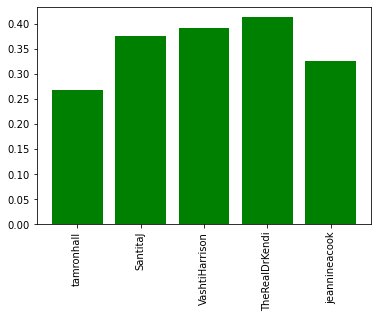

In [65]:
femaleNONAct = femaleNONActivist.groupby('for')[['Subjectivity']].mean()
femaleNONAct['user'] = ['tamronhall','SantitaJ','VashtiHarrison','TheRealDrKendi','jeannineacook']
fig = plt.figure()
plt.bar(femaleNONAct['user'],femaleNONAct['Subjectivity'],color = 'g')
plt.xticks(rotation='vertical')
plt.show()

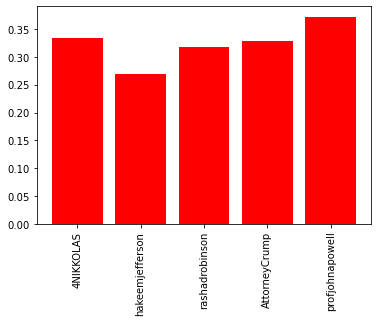

In [66]:
maleAct = maleActivist.groupby('for')[['Subjectivity']].mean()
maleAct['user'] = ['4NIKKOLAS','hakeemjefferson','rashadrobinson','AttorneyCrump','profjohnapowell']
fig = plt.figure()
plt.bar(maleAct['user'],maleAct['Subjectivity'],color = 'r')
plt.xticks(rotation='vertical')
plt.show()

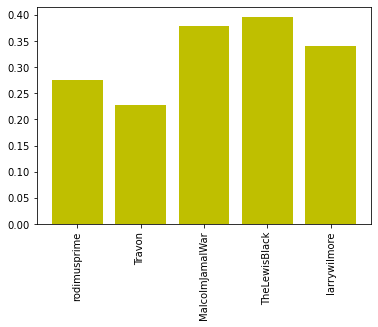

In [67]:
maleNONAct = maleNONActivist.groupby('for')[['Subjectivity']].mean()
maleNONAct['user'] = ['rodimusprime','Travon','MalcolmJamalWar','TheLewisBlack','larrywilmore']
fig = plt.figure()
plt.bar(maleNONAct['user'],maleNONAct['Subjectivity'],color = 'y')
plt.xticks(rotation='vertical')
plt.show()